In [163]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
x = pd.read_csv("data/0_x.csv", header=None)
y = pd.read_csv("data/0_y.csv", header=None)

In [4]:
x.head()

0         1         2         3         4
0  0.071841  0.855352 -0.305597  0.028253  1.826895
1  0.139521 -0.423507  0.461059 -0.447400 -0.034988
2  1.626311 -0.257622 -0.697520  1.413219  1.086292
3 -1.183233 -0.826343  0.073047 -0.639690 -0.503273
4 -0.783365 -0.861232  0.951448 -0.117306  0.680597

In [7]:
x.shape, y.shape

((387, 5), (387, 1))

In [6]:
binary = LinearRegression()
binary.fit(x[[1]], y)
binary.coef_

array([[95.52010745]])

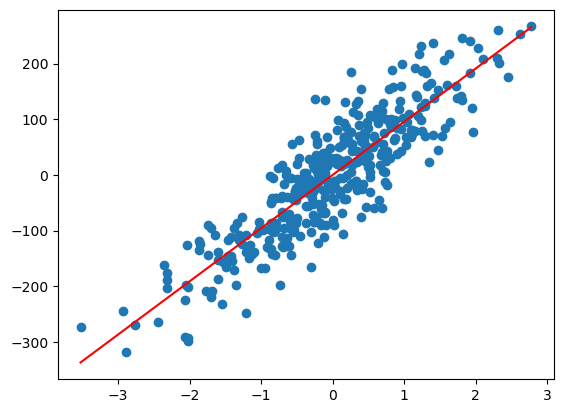

In [13]:
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c="r")

In [18]:
binary.score(x[[1]], y)

0.7699743283650629

In [75]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

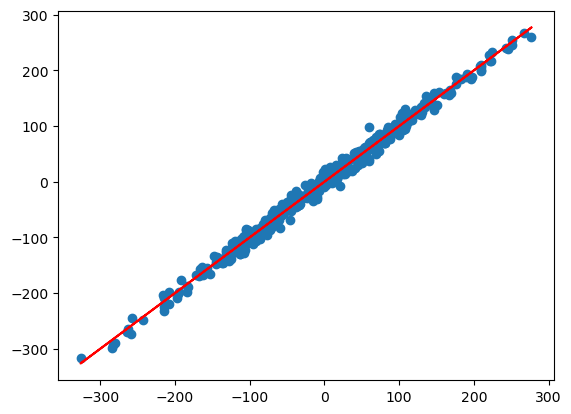

In [20]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c="r")

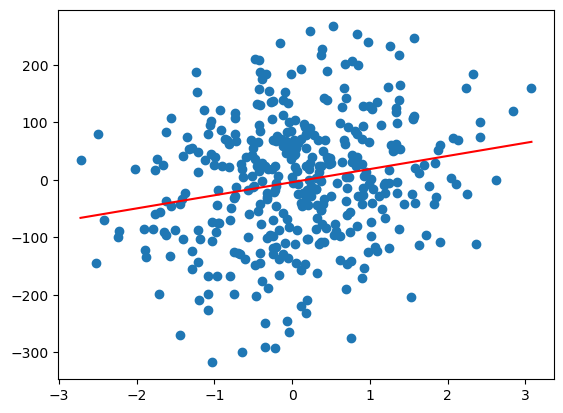

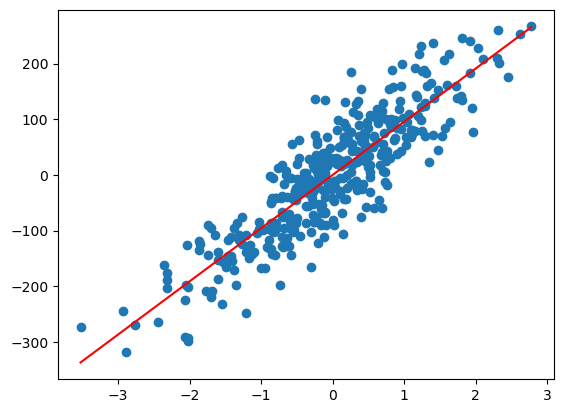

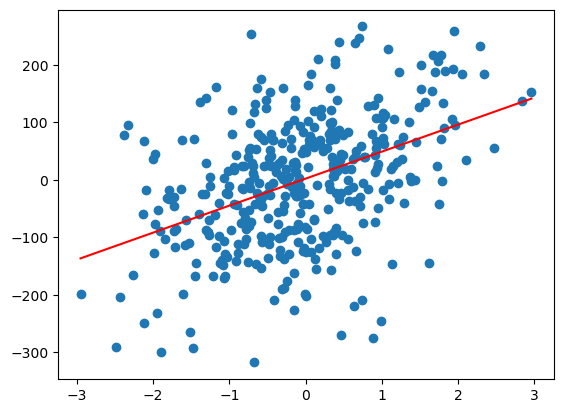

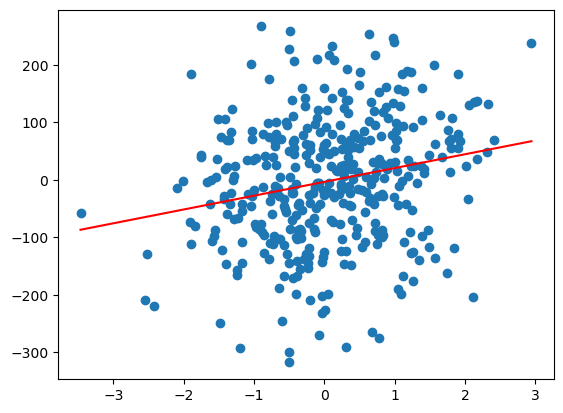

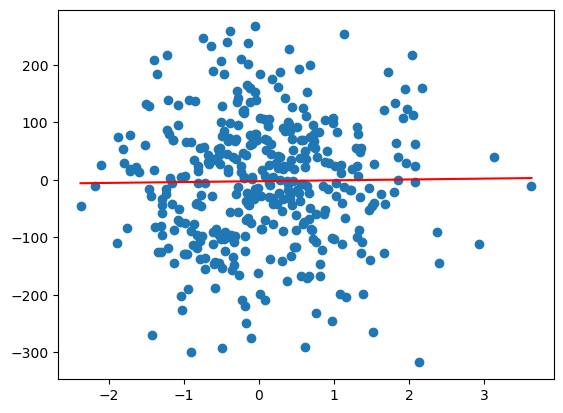

In [8]:
# 1

for i in range(x.shape[1]):
    binary = LinearRegression()
    binary.fit(x[[i]], y)
    plt.scatter(x[i], y)
    xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
    plt.plot(xx, binary.predict(xx), c="r")
    plt.show()

In [93]:
# 2


class Model(object):
    def predict(self, X):
        return np.dot(X, self.b1) + self.b0

    def error(self, X, Y):
        return np.sum((self.predict(X) - Y) ** 2) / (2 * len(Y))

    def score(self, X, Y):
        res = np.sum((self.predict(X) - Y) ** 2)
        tot = np.sum((Y - np.mean(Y)) ** 2)
        return 1 - res / tot

    def fit(self, X, Y, alpha=1, accuracy=1e-2, max_steps=5000):
        errors = []

        self.b0 = 0
        self.b1 = np.zeros(X.shape[1])

        for _ in range(max_steps):
            dJ0 = np.sum(self.predict(X) - Y) / len(Y)
            dJ1 = X.T.dot(self.predict(X) - Y) / len(Y)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            errors.append(self.error(X, Y))

            if len(errors) > 1:
                if errors[-1] > errors[-2]:
                    return self.fit(
                        X, Y, alpha=alpha / 2, accuracy=accuracy, max_steps=max_steps
                    )

                if abs(errors[-1] - errors[-2]) < accuracy:
                    break

        return alpha, errors


hyp = Model()
print(hyp.fit(x, y[0]))
print(hyp.score(x, y[0]))

(1, [186.1647383282259, 51.55708801318347, 46.95541102551905, 46.75617007612382, 46.746642546591055])
0.992219719799139


In [169]:
# 3, 6


def mape(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_true).mean() * 100


rows = []

degrees = [2, 3, 10]
for degree in degrees:
    time_before = time()
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x)
    model = LinearRegression().fit(x_poly, y)
    print(f"порядок {degree}, прошло {time() - time_before} секунд")
    rows.append(
        (
            f"порядок {degree}",
            model.score(x_poly, y),
            mape(y[0].to_numpy(), model.predict(x_poly)[:, 0]),
        )
    )

порядок 2, прошло 0.003933906555175781 секунд
порядок 3, прошло 0.003937721252441406 секунд
порядок 10, прошло 0.2214794158935547 секунд


In [170]:
# 4, 5

rows.extend(
    [
        (
            "sklearn.linear_model.LinearRegression multiple",
            multiple.score(x, y),
            mape(y[0].to_numpy(), multiple.predict(x)[:, 0]),
        ),
        (
            "multiple linear regression from scratch",
            hyp.score(x, y[0]),
            mape(y[0].to_numpy(), hyp.predict(x)),
        ),
    ]
)

for i in range(x.shape[1]):
    binary = LinearRegression()
    binary.fit(x[[i]], y)
    rows.append(
        (
            f"binary {i}",
            binary.score(x[[i]], y),
            mape(y[0].to_numpy(), binary.predict(x[[i]])[:, 0]),
        )
    )

pd.DataFrame(rows, columns=["модель", "коэффициент детерминации", "MAPE"])

модель  коэффициент детерминации  \
0                                       порядок 2                  0.992600   
1                                       порядок 3                  0.993192   
2                                      порядок 10                  1.000000   
3  sklearn.linear_model.LinearRegression multiple                  0.992220   
4         multiple linear regression from scratch                  0.992220   
5                                        binary 0                  0.043643   
6                                        binary 1                  0.769974   
7                                        binary 2                  0.187945   
8                                        binary 3                  0.047470   
9                                        binary 4                  0.000172   

           MAPE  
0  2.753810e+01  
1  2.939010e+01  
2  1.376139e-09  
3  3.332621e+01  
4  3.330219e+01  
5  1.472156e+02  
6  1.635493e+02  
7  1.964023e+02  
8  1.593353e+02  
9  1.019577e+02